<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.3: Stacking

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

---------------------------------------------
## STEP 1: Define the Problem
### Taken directly from the UCI Data Set Information:
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].
<br>
### Possible questions: 
1. What features are most significant in discerning between benign and malignant tumours?
<br>
2. Do malignant tumours have a wider deviation in features than benign tumours?
<br>
3. Can we accurately predict if breast cancer tissue is benign or malignant, given the same features measured?

### Actual Question:
3.

## STEP 2: Find the Data

In [2]:
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

In [3]:
# import all libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

In [4]:
# Load data into a dataframe - no header
df = pd.read_csv(data, header=None)
# Input column names from UCI website
df.columns = ['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity', 'adhesion', 
'cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## STEP 4: Explore and Clean the Data 

In [5]:
# Drop id column
df.drop(['id'], axis=1, inplace=True)

In [6]:
# Perform EDA by investigating each of the points above 
# Number of features, datatypes, and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   clump_thickness   699 non-null    int64 
 1   size_uniformity   699 non-null    int64 
 2   shape_uniformity  699 non-null    int64 
 3   adhesion          699 non-null    int64 
 4   cell_size         699 non-null    int64 
 5   bare_nuclei       699 non-null    object
 6   bland_chromatin   699 non-null    int64 
 7   normal_nucleoli   699 non-null    int64 
 8   mitoses           699 non-null    int64 
 9   class             699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


No null values (so far), need to convert class (coded content) into binary data, and bare_nuclei into int64 like the rest of the data

In [7]:
# Drop any duplicate rows
df.drop_duplicates()

# Check length to see how df affected
df.shape

(699, 10)

In [8]:
# Describe data - domain and intervals
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
# Check for outliers
# Perform after changing datatypes

## STEP 5: Prepare the Data

In [10]:
# Ensemble methods are relatively robust to outliers - will not remove
# Filter/subset/clean the data according to your EDA findings
# No null or missing values
# Need to deal with column datatypes

In [11]:
# Need to change 'class' to binary data
# Check values in 'class'
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [12]:
# Two values, benign and malignant. in binary data (2 for benign, 4 for malignant)
df['class'] = df['class'] == 4

# Verify
print(df['class'].dtypes)
df['class'].value_counts()

bool


False    458
True     241
Name: class, dtype: int64

In [13]:
# Need to change 'bare_nuclei' from object to int64
def test_apply(x):
    try: 
        return np.int64(x)
    except ValueError:
        return np.NaN

df['bare_nuclei'] = df['bare_nuclei'].apply(test_apply)
# Check for column dtypes and null values after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clump_thickness   699 non-null    int64  
 1   size_uniformity   699 non-null    int64  
 2   shape_uniformity  699 non-null    int64  
 3   adhesion          699 non-null    int64  
 4   cell_size         699 non-null    int64  
 5   bare_nuclei       683 non-null    float64
 6   bland_chromatin   699 non-null    int64  
 7   normal_nucleoli   699 non-null    int64  
 8   mitoses           699 non-null    int64  
 9   class             699 non-null    bool   
dtypes: bool(1), float64(1), int64(8)
memory usage: 50.0 KB


In [14]:
# Data successfully converted to numeric. Deal with na values by filling with mean
df = df.fillna(df['bare_nuclei'].mean())

# Verify
df.isna().sum()

clump_thickness     0
size_uniformity     0
shape_uniformity    0
adhesion            0
cell_size           0
bare_nuclei         0
bland_chromatin     0
normal_nucleoli     0
mitoses             0
class               0
dtype: int64

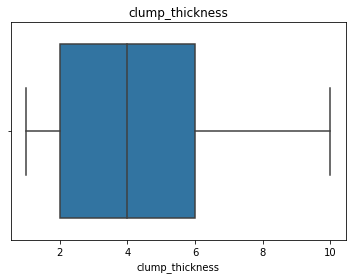

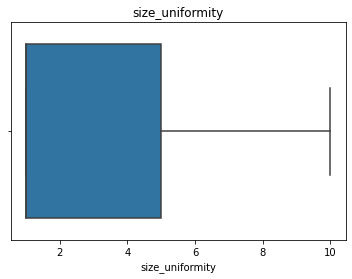

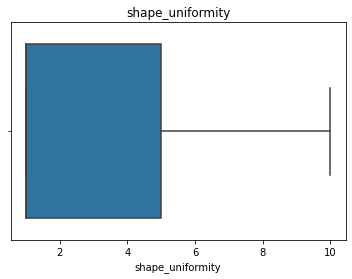

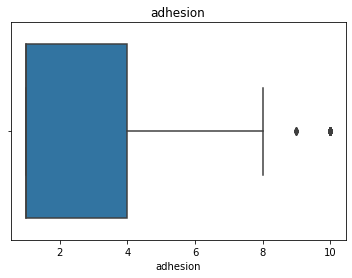

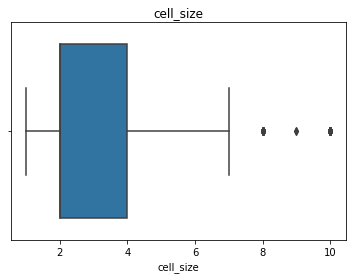

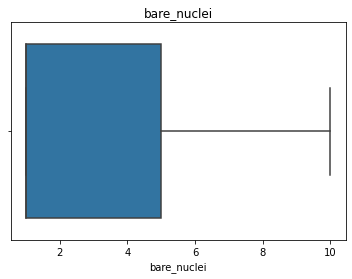

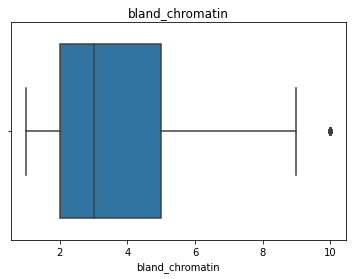

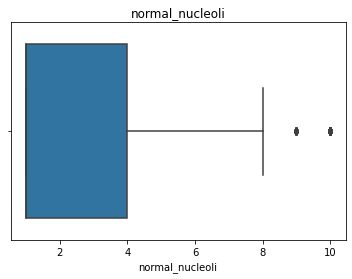

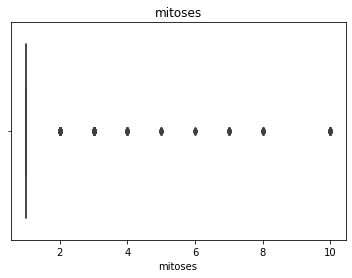

In [15]:
# Check outliers (see above)
for i in range(9):
    plt.figure()
    sns.boxplot(x=df[df.columns[i]])
    plt.title(df.columns[i])

In [16]:
# Split into target and features
y = df['class']
X_unscaled = df.drop('class', axis=1)

# standardise features
X = StandardScaler().fit_transform(X_unscaled)

## STEP 6: Modelling

Will be using 10 features and target/label as defined in Step 5
<br><br>
Output variable is a binary value (0 = Benign tumour, 1 = Malignant tumour)
<br><br>
Model will be supervised binary classification

## STEP 7: Splitting the Data

In [34]:
# Use train/test split, 1/5 of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## STEP 8: Define Model

In [35]:
# Where possible, for base models, choose parameters that were optimal in previous labs
dt = ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random'))
lr = ('lr', LogisticRegression())
knn = ('knn', KNeighborsClassifier())
svm = ('svm', SVC())
bayes = ('bayes', GaussianNB())
# Define base model sets to test in grid search - L1 estimator swapped around
base_models, L1_model = [dt, knn, svm, bayes, lr], lr[1]

# Define stacking model
model = StackingClassifier(estimators=base_models, final_estimator=L1_model)

## STEP 9: Fit the model

In [36]:
# Fit model
model_fitted = model.fit(X_train, y_train)

## STEP 10: Evaluate training model

The accuracy score is: 0.9749552772808586
AUC: 0.9956443129520053


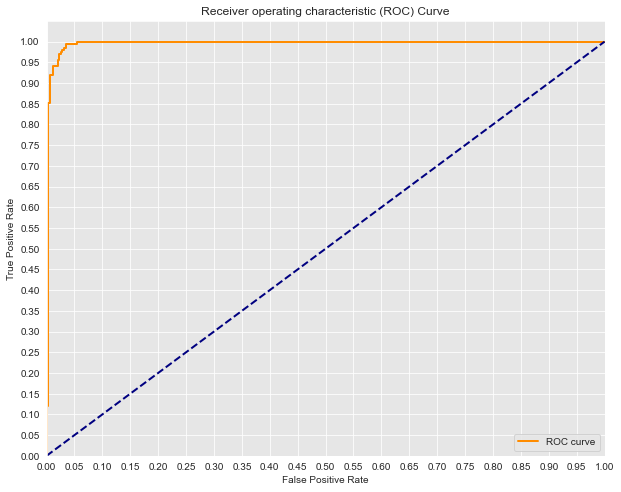

In [37]:
# Check against train data
# Generate predictions
y_predict = model_fitted.predict(X_train)
probs = model_fitted.predict_proba(X_train)
# Check accuracy score
accuracy = accuracy_score(y_train, y_predict)
print('The accuracy score is:', accuracy)

# Create ROC curve
# Find fpr and tprs
fpr, tpr, thresholds = roc_curve(y_train, probs[:,1])

# Plot
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## STEP 11: Evaluate test model

The accuracy score is: 0.9714285714285714
AUC: 0.9835740583404136


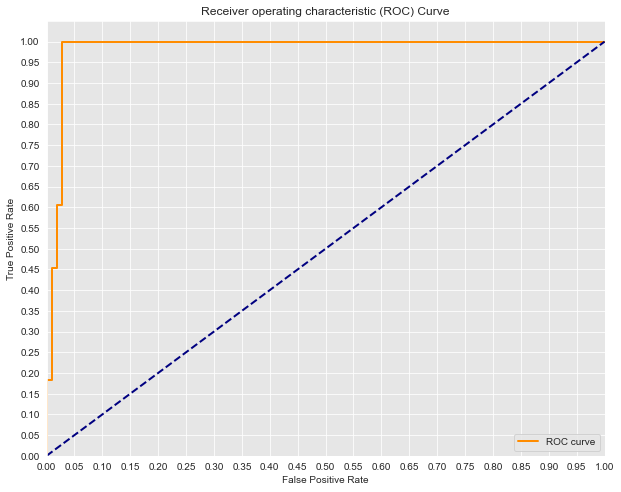

In [38]:
# Check against test data
# Generate predictions
y_predict = model_fitted.predict(X_test)
probs = model_fitted.predict_proba(X_test)
# Check accuracy score
accuracy = accuracy_score(y_test, y_predict)
print('The accuracy score is:', accuracy)

# Create ROC curve
# Find fpr and tprs
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])

# Plot
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## STEP 12: Answer the Question / Solve the Problem

We can predict which breast cancer sample is malignant with a 97% accuracy, according to the given dataset. Will need further exploration to see if it applies in a wider context, and with samples collected in different environments.
<br><br>
In terms of utility to the diagnosis of breast cancer, this would allow medical professionals to minimise human error in the process of diagnosing cancer, as well as save on surgery costs/prioritise certain surgeries with more reliable screening of benign cancers.



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



